<a href="https://colab.research.google.com/github/hsiuliwang/algorithm_test/blob/master/109%E6%BC%94%E7%AE%97%E6%B3%95%E6%9C%9F%E6%9C%AB%E8%80%83_MY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**109演算法期末考**

*   每題25分共125分
*   1/13 23:59前完成不扣分;
*   11/14 11:59前減5分;11/14 23:59前減10分；1/15 11:59前減15分;
*   最遲需於1/15 11:59前繳交!
*   請在解題想法區塊寫上解題的想法/思路、所使用的演算法及其原因(最好有推導過程)
*   程式碼需可以執行，且依照題目說明的輸入輸出規範
*   檔名改成 XXX_109演算法期末考.ipynb







第一題：
請從一個整數Array中，找出第K大的元素

Exp：輸入: {5,3,8,2,9,4,6} 
          K=2
    輸出: Ans:8


解題想法：

In [ ]:
#程式

第二題： 找零錢問題
目前有 1,2,5,10 四種面值的硬幣，請算出有總共有幾種方式湊N元?


Exp：輸入N=32，輸出：各種湊出32元的組合



解題想法：

In [ ]:
#程式

第三題： 有個小偷到3C用品店偷東⻄,假設他的背包的負重最多可達10公斤,他希望在背包中裝入負重範圍內可得之總價物品,小偷的背包應該怎麼裝才能帶走最有價值的商品?

* 每個商品只有拿走/留著這兩種狀況
* 每個商品不能被切割（如拿1/3個）
* 每個商品也不能被拿超過一次
* 請輸出所選擇的產品之編號，單價，總價，背包總重量


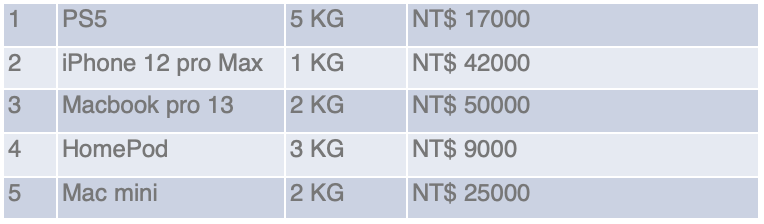








解題想法：

In [ ]:
#程式

第四題：請以深度優先搜尋(DFS)、廣度優先搜尋法(BFS)走訪有向圖中的所有節點，並印出兩種搜尋法的走訪順序

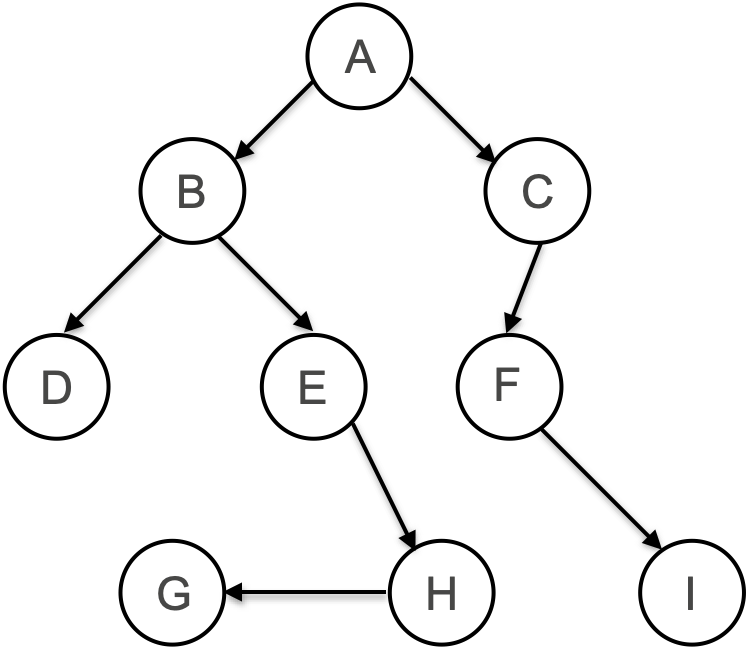

解題想法：

In [ ]:
#程式


第五題： 請用 Kruskal或Prim 演算法(2選1)找出下圖的最小生成樹，並依照順序寫出加入的每一個邊

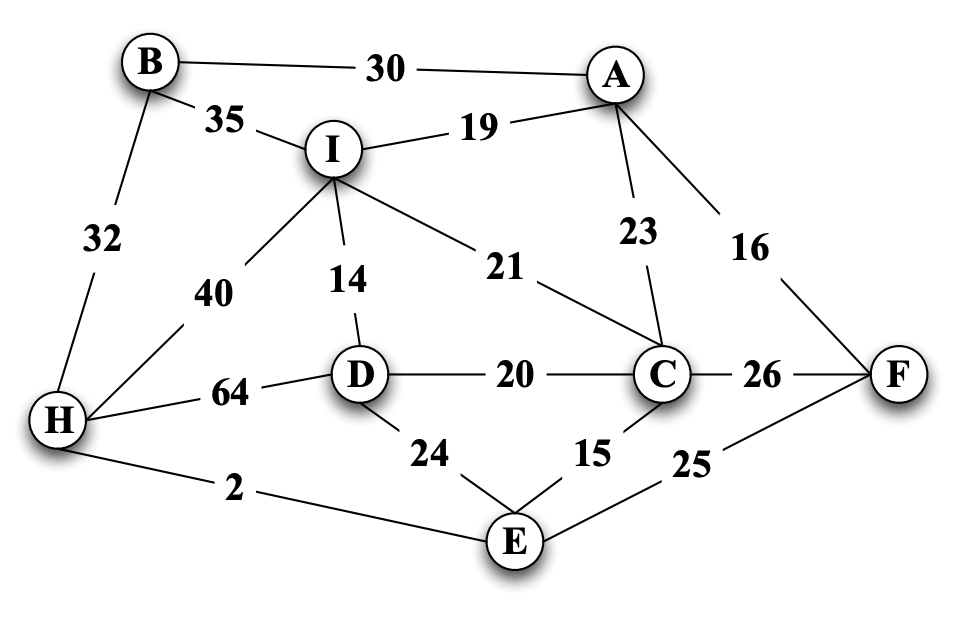

解題想法：
'''最小生成樹是什麼？ 
給定一個連接的和無向的圖，該圖的生成樹是一個子圖，它是一棵樹，並將所有頂點連接在一起。單個圖可以具有許多不同的生成樹。加權，連接和無向圖的最小生成樹（MST）或最小權重生成樹是權重小於或等於其他所有生成樹的權重的生成樹。生成樹的權重是賦予生成樹的每個邊緣的權重之和。
最小生成樹有幾個邊？ 
最小生成樹具有（V – 1）個邊，其中V是給定圖中的頂點數。 
最小生成樹有哪些應用？

我選擇使用Kruskal算法查找MST的步驟:
1.按重量的遞減順序對所有邊緣進行排序。 
2.選擇最小的邊緣。檢查它是否與形成的生成樹形成一個循環。如果未形成循環，則包括該邊。否則，將其丟棄。 
3.重複步驟2，直到生成樹中有（V-1）個邊。

'''
先找出所有點與邊
進行排列、畫出來
列出所有點如下

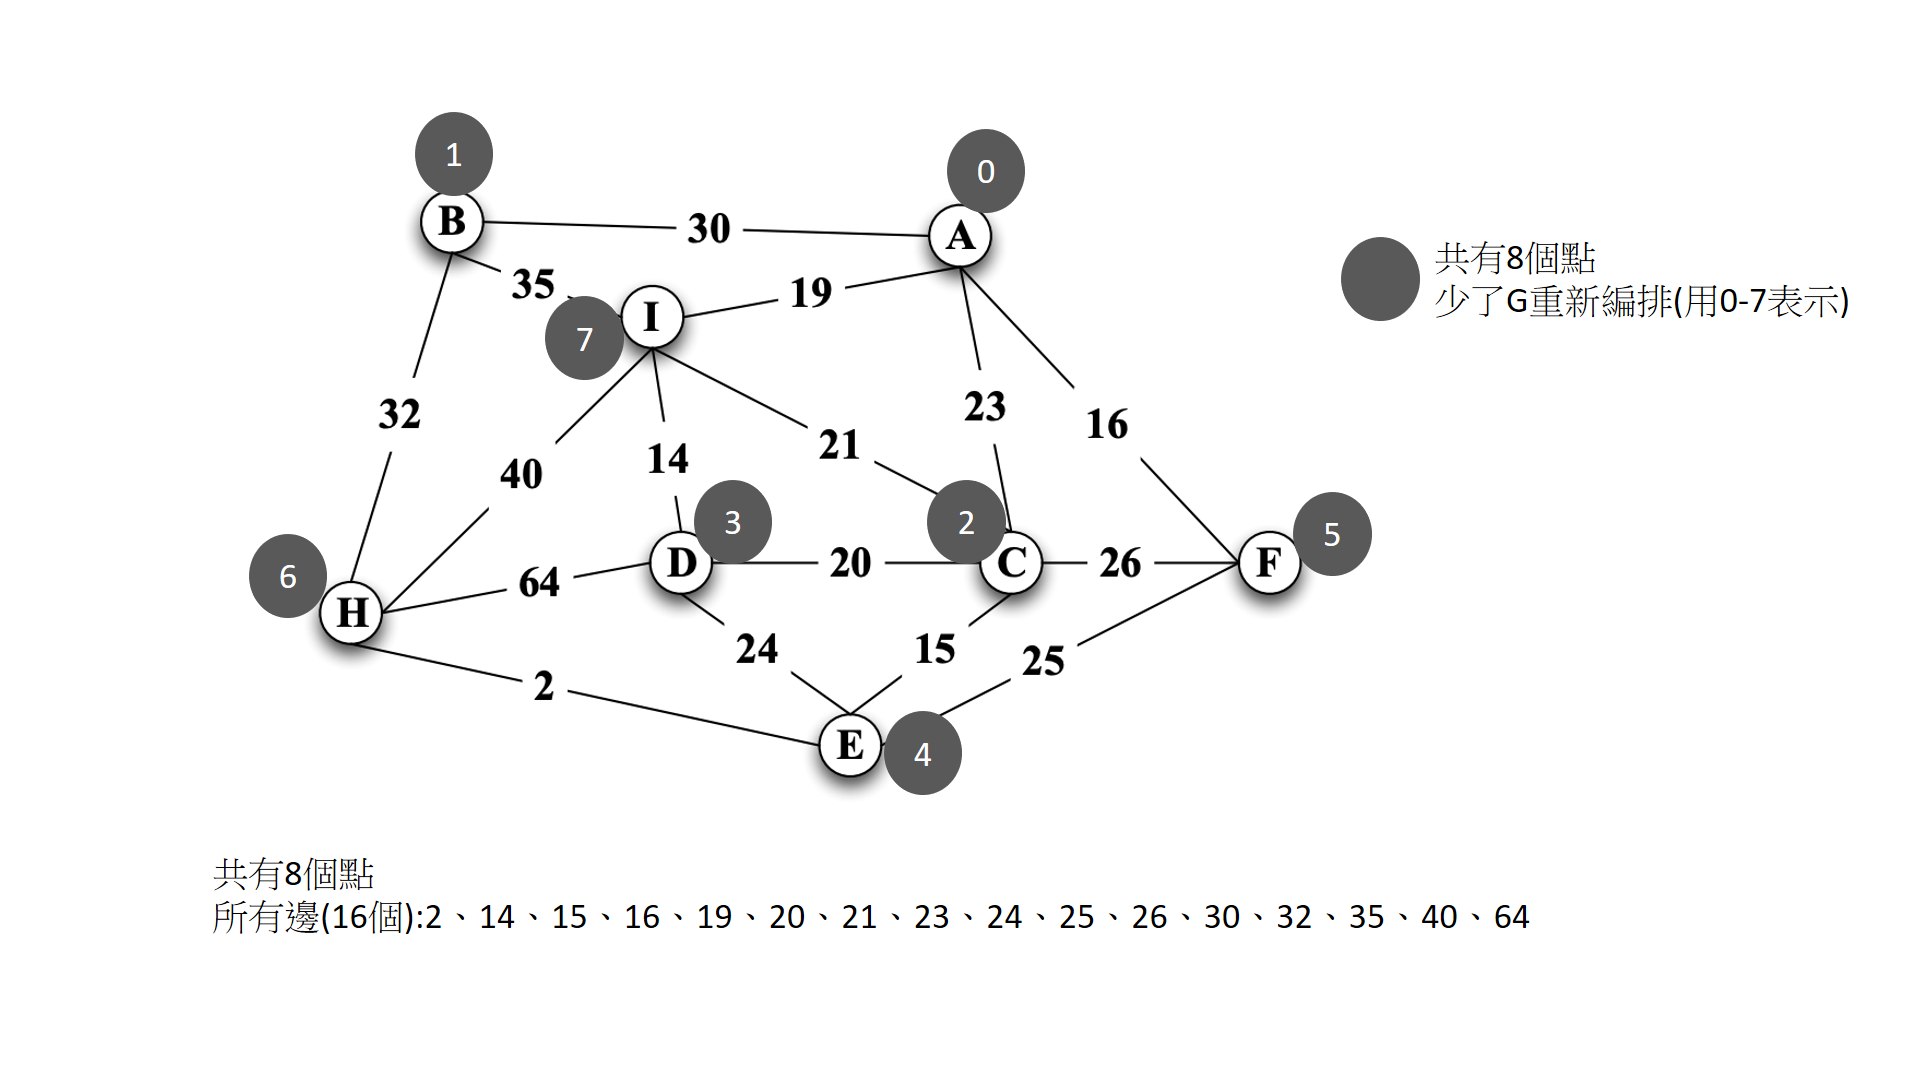





In [7]:
#程式

##python 排序
####依照長度排序



##（Kruskal’s algorithm)求最小生成樹
##參考:https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/

# Python program for Kruskal's algorithm to find ##用Kruskal演算法
# Minimum Spanning Tree of a given connected,  ##給定連接的最小生成樹 找最小生成樹
# undirected and weighted graph ##無向圖

from collections import defaultdict

# Class to represent a graph


class Graph:

	def __init__(self, vertices):
		self.V = vertices # No. of vertices
		self.graph = [] # default dictionary
		# to store graph

	# function to add an edge to graph
	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])  ##點u 點v u,v長度為w

	# A utility function to find set of an element i ##查找元素集i的實用函數
	# (uses path compression technique)
	def find(self, parent, i):
		if parent[i] == i:
			return i
		return self.find(parent, parent[i])

	# A function that does union of two sets of x and y ##一個將兩集合x和y進行聯集的函數
	# (uses union by rank)
	def union(self, parent, rank, x, y):
		xroot = self.find(parent, x)
		yroot = self.find(parent, y)

		# Attach smaller rank tree under root of
		# high rank tree (Union by Rank)
		if rank[xroot] < rank[yroot]:
			parent[xroot] = yroot
		elif rank[xroot] > rank[yroot]:
			parent[yroot] = xroot

		# If ranks are same, then make one as root
		# and increment its rank by one
		else:
			parent[yroot] = xroot
			rank[xroot] += 1

	# The main function to construct MST using Kruskal's
		# algorithm
	def KruskalMST(self):

		result = [] # This will store the resultant MST
		
		# An index variable, used for sorted edges
		i = 0
		
		# An index variable, used for result[]
		e = 0

		# Step 1: Sort all the edges in           ##1排好所有的邊
		# non-decreasing order of their
		# weight. If we are not allowed to change the
		# given graph, we can create a copy of graph
		self.graph = sorted(self.graph, 
							key=lambda item: item[2])    #########################
              ###key=lambda 元素: 元素[字段索引]
              ####例如：想對元素第二个字段排序，則###key=lambda y: y[1] 備註：这里y可以是任意字母，等同key=lambda x: x[1]
		parent = []
		rank = []

		# Create V subsets with single elements
		for node in range(self.V):
			parent.append(node)
			rank.append(0)

		# Number of edges to be taken is equal to V-1
		while e < self.V - 1:

			# Step 2: Pick the smallest edge and increment ##2選擇最短的邊
			# the index for next iteration
			u, v, w = self.graph[i]
			i = i + 1
			x = self.find(parent, u)
			y = self.find(parent, v)

			# If including this edge does't         ##判斷是否有環
			# cause cycle, include it in result 
			# and increment the indexof result 
			# for next edge
			if x != y:
				e = e + 1
				result.append([u, v, w])
				self.union(parent, rank, x, y)
			# Else discard the edge

		minimumCost = 0
		print('依照順序寫出加入的每一個邊') 
		for u, v, weight in result:
			minimumCost += weight
			print("%d -- %d == %d" % (u, v, weight))
		print("最小生成樹" , minimumCost) ##印出最小生成樹

# Driver code

myg = Graph(8) ##共有7個點
##列出所有的邊(點1,點2,邊)
myg.addEdge(0, 1, 30)
myg.addEdge(0, 2, 23)
myg.addEdge(0, 5, 16)
myg.addEdge(0, 7, 19)

myg.addEdge(1, 6, 32)
myg.addEdge(1, 7, 35)

myg.addEdge(2, 3, 20)
myg.addEdge(2, 4, 15)
myg.addEdge(2, 5, 26)
myg.addEdge(2, 7, 21)

myg.addEdge(3, 4, 24)
myg.addEdge(3, 6, 64)
myg.addEdge(3, 7, 14)

myg.addEdge(4, 5, 25)
myg.addEdge(4, 6, 2)

myg.addEdge(6, 7, 40)


# Function call

print("----用Kruskal’s algorithm求最小生成樹-----")
myg.KruskalMST()
# This code is contributed by Neelam Yadav

----用Kruskal’s algorithm求最小生成樹-----
依照順序寫出加入的每一個邊
4 -- 6 == 2
3 -- 7 == 14
2 -- 4 == 15
0 -- 5 == 16
0 -- 7 == 19
2 -- 3 == 20
0 -- 1 == 30
最小生成樹 116


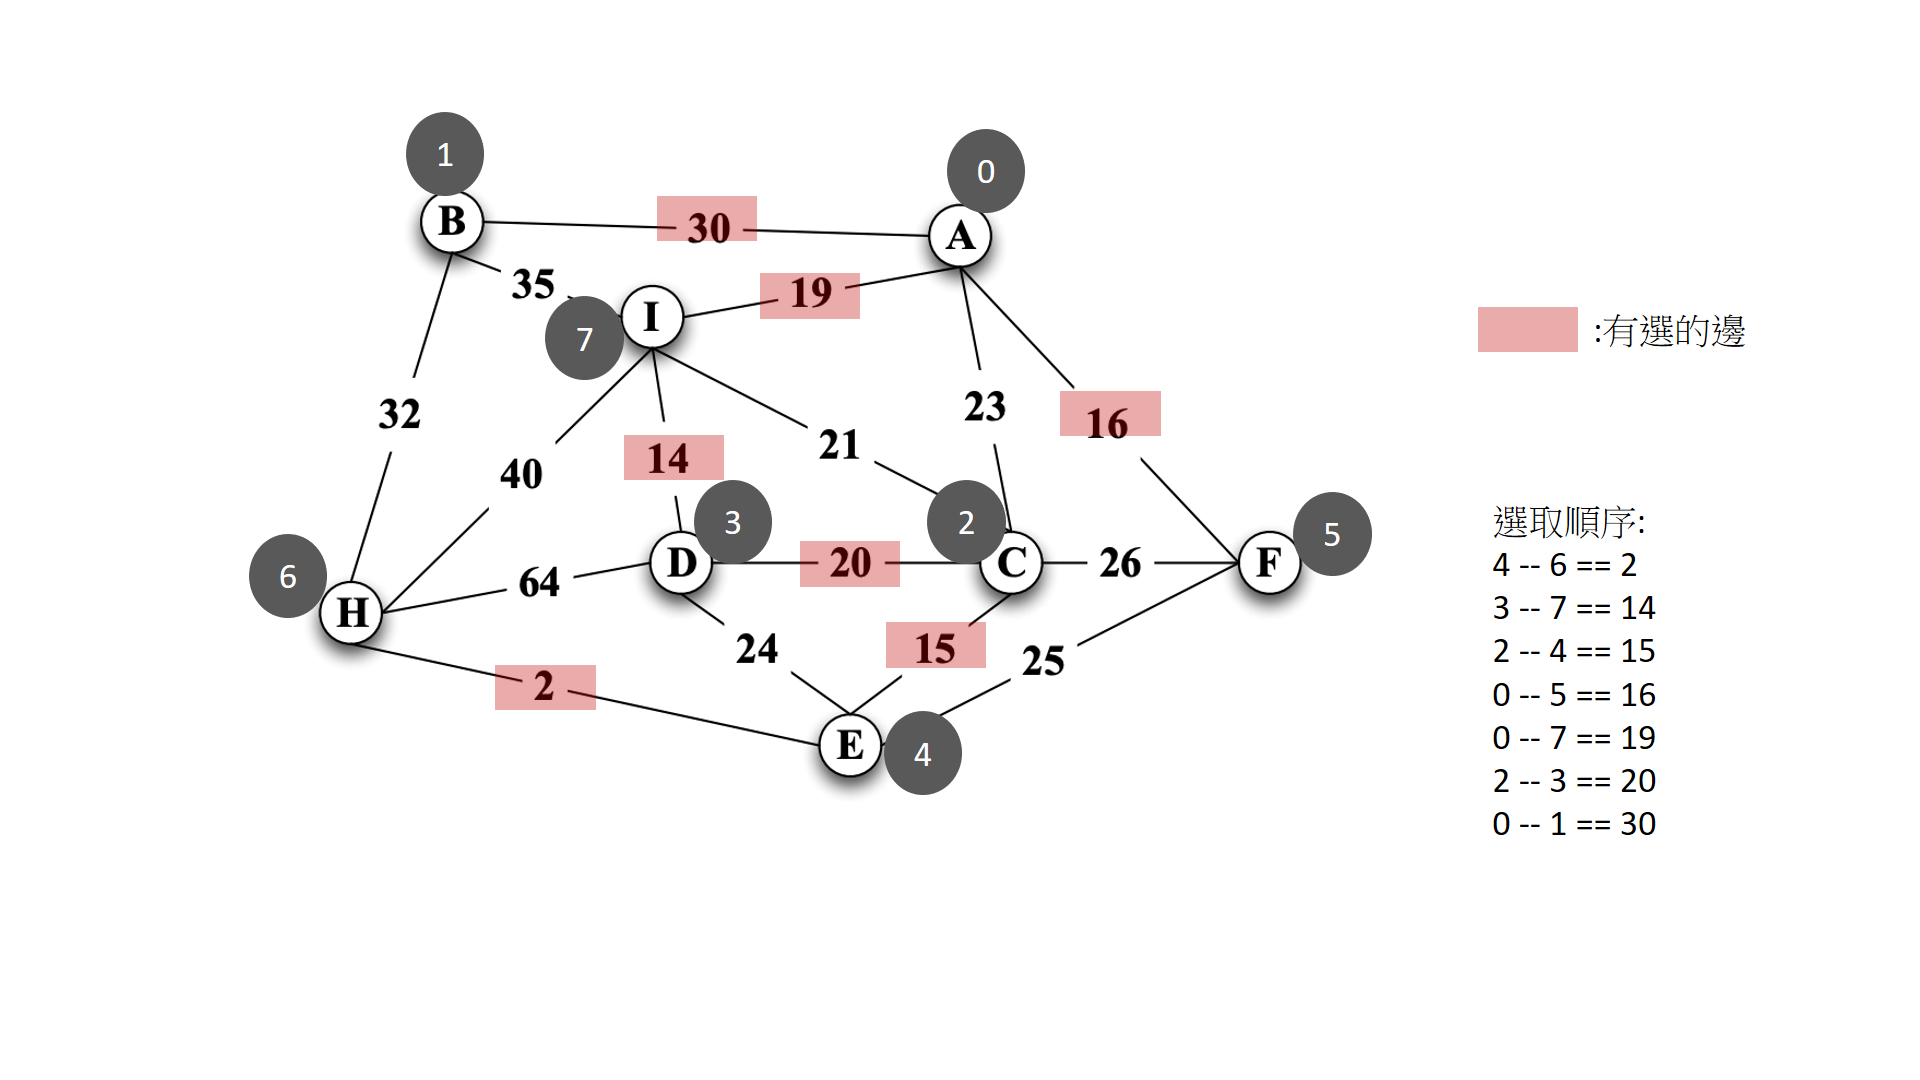